In [12]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action='ignore')

data = pd.read_csv('data/data_all.csv') # user, item 중복된 데이터 제거

In [13]:
print(data['userid'].nunique())
print(data['rest'].nunique())
print(np.round((1 - data.shape[0] / (data['userid'].nunique() * data['rest'].nunique())) * 100,4))

1692534
41460
99.9845


약 170만명의 유저, 4만 개의 식당이 존재합니다.

희소행렬비율은 99.98%로 많이 sparse한 모습입니다.

In [14]:
_user = data['userid'].value_counts().reset_index()
_user.columns = ['userid', 'cnt']
data_not_cold = pd.merge(data, _user, how = 'left', on = 'userid')
data_not_cold = data_not_cold[data_not_cold['cnt'] > 5].reset_index(drop = True)

print(data_not_cold['userid'].nunique())
print(data_not_cold['rest'].nunique())
print(np.round((1 - data_not_cold.shape[0] / (data_not_cold['userid'].nunique() * data_not_cold['rest'].nunique())) * 100,4))

382940
41460
99.9451


5개 이상 방문 이력이 있는 유저를 관찰한 결과 약 38만명의 유저, 4만 개의 식당이 존재합니다.

희소행렬비율은 99.94%로 이전보단 dense 해졌습니다.

99.95 보다 dense한 데이터를 목표로 했기 때문에 5개 이상 방문 이력이 있는 유저를 대상으로 모델링을 진행하려합니다.

<AxesSubplot: >

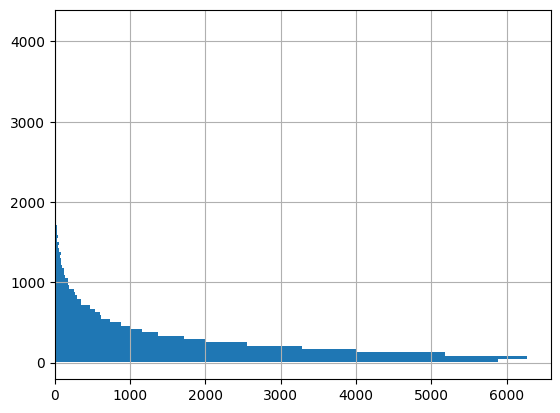

In [15]:
data['rest'].value_counts().hist(orientation='horizontal', bins=100)

long-tail을 관찰하기 위해 사용한 코드 입니다.

몇몇 인기 있는 식당의 방문 기록이 편중된 느낌이긴 하지만 많이 심해보이진 않습니다.

모든 식당을 조사하기 보단 인기있는 식당 위주로 크롤링하였기 때문에 long-tail 문제가 두드러지진 않는 것 같아요.

In [19]:
data['userid'].value_counts()

5e48b1458f87a842bc5d14b3    542
5bdea6e87928af2f472f97f8    512
5ed5e0ed8f87a842bc7d5ca6    483
5bc69fac446df35606a76b9d    415
5f2517639ec8258e4ad51321    414
                           ... 
5efdea45b4dd01caff09b53c      1
5c6fc8139b90dc048b43be43      1
5dce636b8f87a842bcaf1d77      1
5d69f9378f87a842bc1b082f      1
5bdbe61b18825187595cf869      1
Name: userid, Length: 1692534, dtype: int64

약 4만개 식당 중 500개 넘개 방문하신 분도 계실 정도로 열정적이신 분들이 많은 것 같습니다.